## Target calculation ##


### Tiff's notes ###

 - could leave padding (-> target size) more flexible - but given that x2 always seems to work best this probably isn't necessary



In [26]:
import matplotlib.pyplot as plt
import numpy as np
import theano

%matplotlib inline

def quick_plot(target):
    N = target.shape[0]
    plot_args = {'extent': [0, N, 0, N],
                 'interpolation': 'None',
                 'origin': 'lower'}
    fig, ax = plt.subplots(ncols=1, figsize=(5,5))
    ax.imshow(target, **plot_args)

Saved to targets/example_power2_512_(350,350)_32.dat


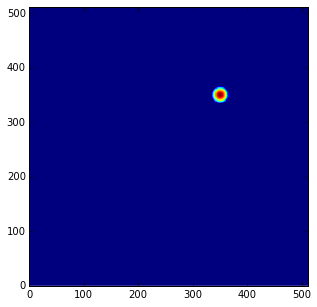

In [40]:
def make_power2(n, r0, d, A=1.0):
    """
    Create n x n target: 
    2nd order power law centred on r0=(x0,y0) with diameter d and amplitude A
    """
    x = np.array(range(n))*1.
    X, Y = np.meshgrid(x, x)
    
    delta_r2 = np.power(X - r0[0], 2) + np.power(Y - r0[1], 2)
    z = A - 4*A/d**2 * delta_r2
    z[delta_r2 > d**2/4] = 0
    
    return z

params = {'n': 512,
          'r0': (350, 350),
          'd': 32,
          'A': 1.0}
t = make_power2(**params)
filename = 'targets/example_power2_{n}_{r0}_{d}.dat'.format(**params).replace(' ', '')
quick_plot(t)
np.savetxt(filename, t)
print 'Saved to ' + filename